<a href="https://colab.research.google.com/github/KirolosKhairy/ELIA-1/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обнаружение мошеннических транзакций

Целевой признак - Class. 1 - мошенническая транзакция, 0 - нормальная.

**Файл с данными: "Fraud_data_transaction.csv"**
https://drive.google.com/file/d/1ZwZIZrsZzxYjSv_pO3bTqxTzhmYI6Xs8/view?usp=sharing

**Цели работы:**

1. Поскольку данные несбалансированы (вы должны проиллюстрировать это), то нужно создать таблицу данных с распределением 50/50 для «мошеннических» и «немошеннических» транзакций. (Алгоритм NearMiss)
2. Определить с каким классификатором будет более высокая точность предсказаний.
3. Создать нейронную сеть и сравнить точность с нашим лучшим классификатором.


**План:**
1. Прочитать данные, создать датафрейм.

2. Предварительная обработка:
a) Масштабирование и распределение;
b) Разделение данных.

3. Простое повторное использование данных (Random oversampling) и уменьшение количества данные в более представленных классах (Undersampling):
a) Распределение и корреляция;
b) Обнаружение аномалий;
c) Снижение размерности и кластеризация (t-SNE);
d) Классификаторы;
e) Более глубокий взгляд на логистическую регрессию;
f) Генерация синтетических данных с SMOTE;

4. Оценка модели логистической регрессии на тестовом наборе.

**Важно!** Данные несбалансированны. Большинство транзакций были немошенническими (99,83%). Покажите это.

Если использовать эти данные без предварительной обработки в качестве основы для прогностических моделей и анализа, можно получить много ошибок, связанные с переобучением.

## Датафрейм

In [11]:
import pandas as pd

df = pd.read_csv('/content/Fraud_data_transaction.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
df.isnull().sum().max()

0

In [16]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Покажите, что данные несбалансированы.

In [15]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


## Масштабирование и распределение
На этом этапе нужно масштабировать столбцы Time и Amount.
Также необходимо создать подвыборку фрейма данных, чтобы иметь равное количество случаев мошенничества и немошенничества, что поможет алгоритмам лучше понять закономерности, которые определяют, является ли транзакция мошенничеством или нет.

**Что такое подвыборка?**
В этом сценарии наша подвыборка будет фреймом данных с соотношением мошеннических и немошеннических транзакций 50/50. Это означает, что ваша подвыборка будет иметь одинаковое количество мошеннических и немошеннических транзакций.

In [17]:
!pip install -q imbalanced-learn

In [18]:
from imblearn.under_sampling import NearMiss

X = df.drop('Class', axis=1)
y = df['Class']

nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)

print("После балансировки:")
print(y_res.value_counts())

После балансировки:
Class
0    492
1    492
Name: count, dtype: int64


<ipython-input-21-2653ef3ef356>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-21-2653ef3ef356>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


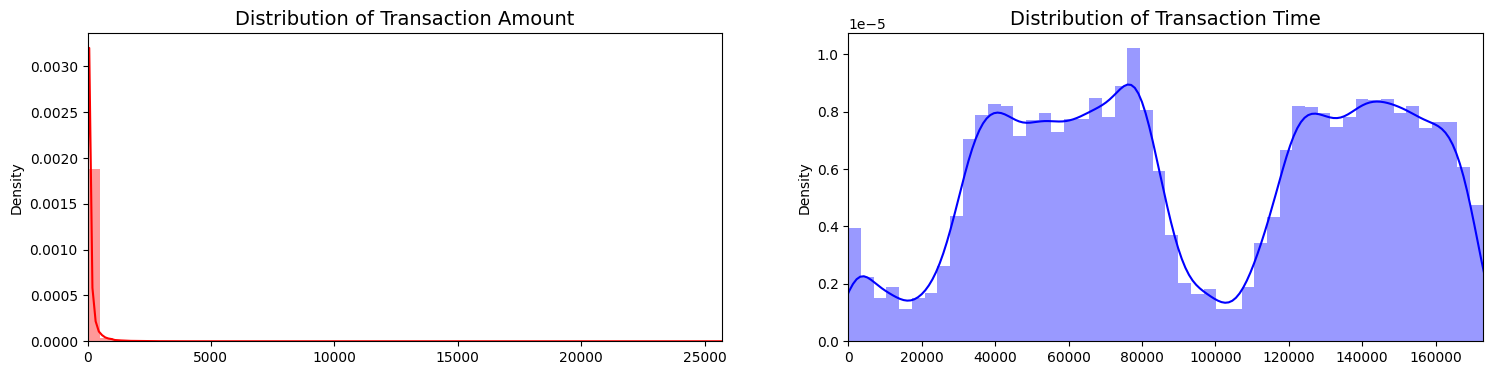

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [23]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Разделение данных


In [25]:
from sklearn.model_selection import StratifiedKFold

X = df.drop("Class", axis=1)
y = df["Class"]

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [26]:
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    break

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]


In [27]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

Покажите, что обучающие и тестовые данные распределены одинаково.

In [29]:
import numpy as np

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions:\n')
print(f'Обучающая выборка: {dict(zip(train_unique_label, train_counts_label))}')
print(f'Тестовая выборка: {dict(zip(test_unique_label, test_counts_label))}')


Label Distributions:

Обучающая выборка: {np.int64(0): np.int64(227452), np.int64(1): np.int64(393)}
Тестовая выборка: {np.int64(0): np.int64(56863), np.int64(1): np.int64(99)}


## Простое повторное использование данных  (Random Under-Sampling):

На этом этапе необходимо реализовать случайную недостаточную выборку, которая заключается в удалении данных для получения более сбалансированного набора данных и, таким образом, избежания переобучения моделей.



Поскольку наши классы сильно перекошены, мы должны сделать их эквивалентными, чтобы иметь нормальное распределение классов.
Перемешайте данные перед созданием подвыборок

In [30]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:len(fraud_df)]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
249115,-0.193251,0.817256,-1.103183,1.694681,0.717745,2.255045,1.490502,-0.160948,1.039978,0.373624,...,-0.189043,-0.118776,-0.826690,-0.248954,0.595880,0.898409,-0.238954,-0.258671,-0.173643,0
251866,-0.252917,0.832282,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,...,0.461032,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,1
8425,-0.020960,-0.862322,-1.516162,0.827377,2.523058,0.599819,-0.212345,0.517720,-0.953266,-1.439079,...,-0.539574,1.496979,-0.032315,-0.250074,0.095452,0.059526,0.705323,0.124425,0.026169,0
192687,3.551596,0.530034,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,...,0.361169,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,1
11343,-0.293440,-0.762814,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,...,1.002764,-2.366836,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1


In [31]:
print("Распределение классов в новой выборке:")
print(new_df['Class'].value_counts())

Распределение классов в новой выборке:
Class
0    492
1    492
Name: count, dtype: int64


##  Равномерное распределение и корреляция:

Теперь, когда данные сбалансированы, можно продолжить анализ и предварительную обработку данных.

Распределение классов в подвыборке:
Class
0    0.5
1    0.5
Name: count, dtype: float64


<ipython-input-32-efdff545eb32>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=new_df, palette='coolwarm')


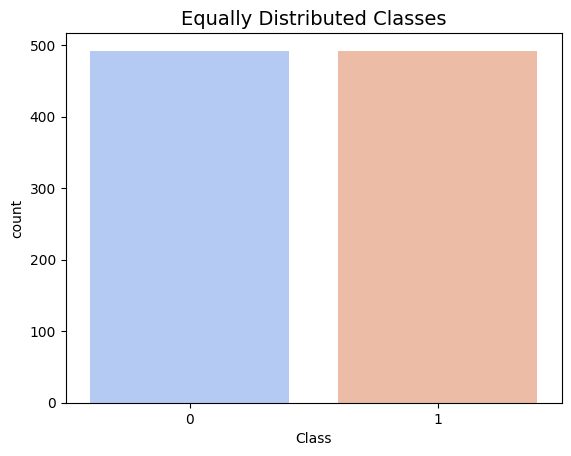

In [32]:
print('Распределение классов в подвыборке:')
print(new_df['Class'].value_counts() / len(new_df))

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=new_df, palette='coolwarm')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

**Постройте матрицу корреляций для датафрейма df.**

Сделайте выводы о том, каким образом признаки могут влиять на целевую переменную.


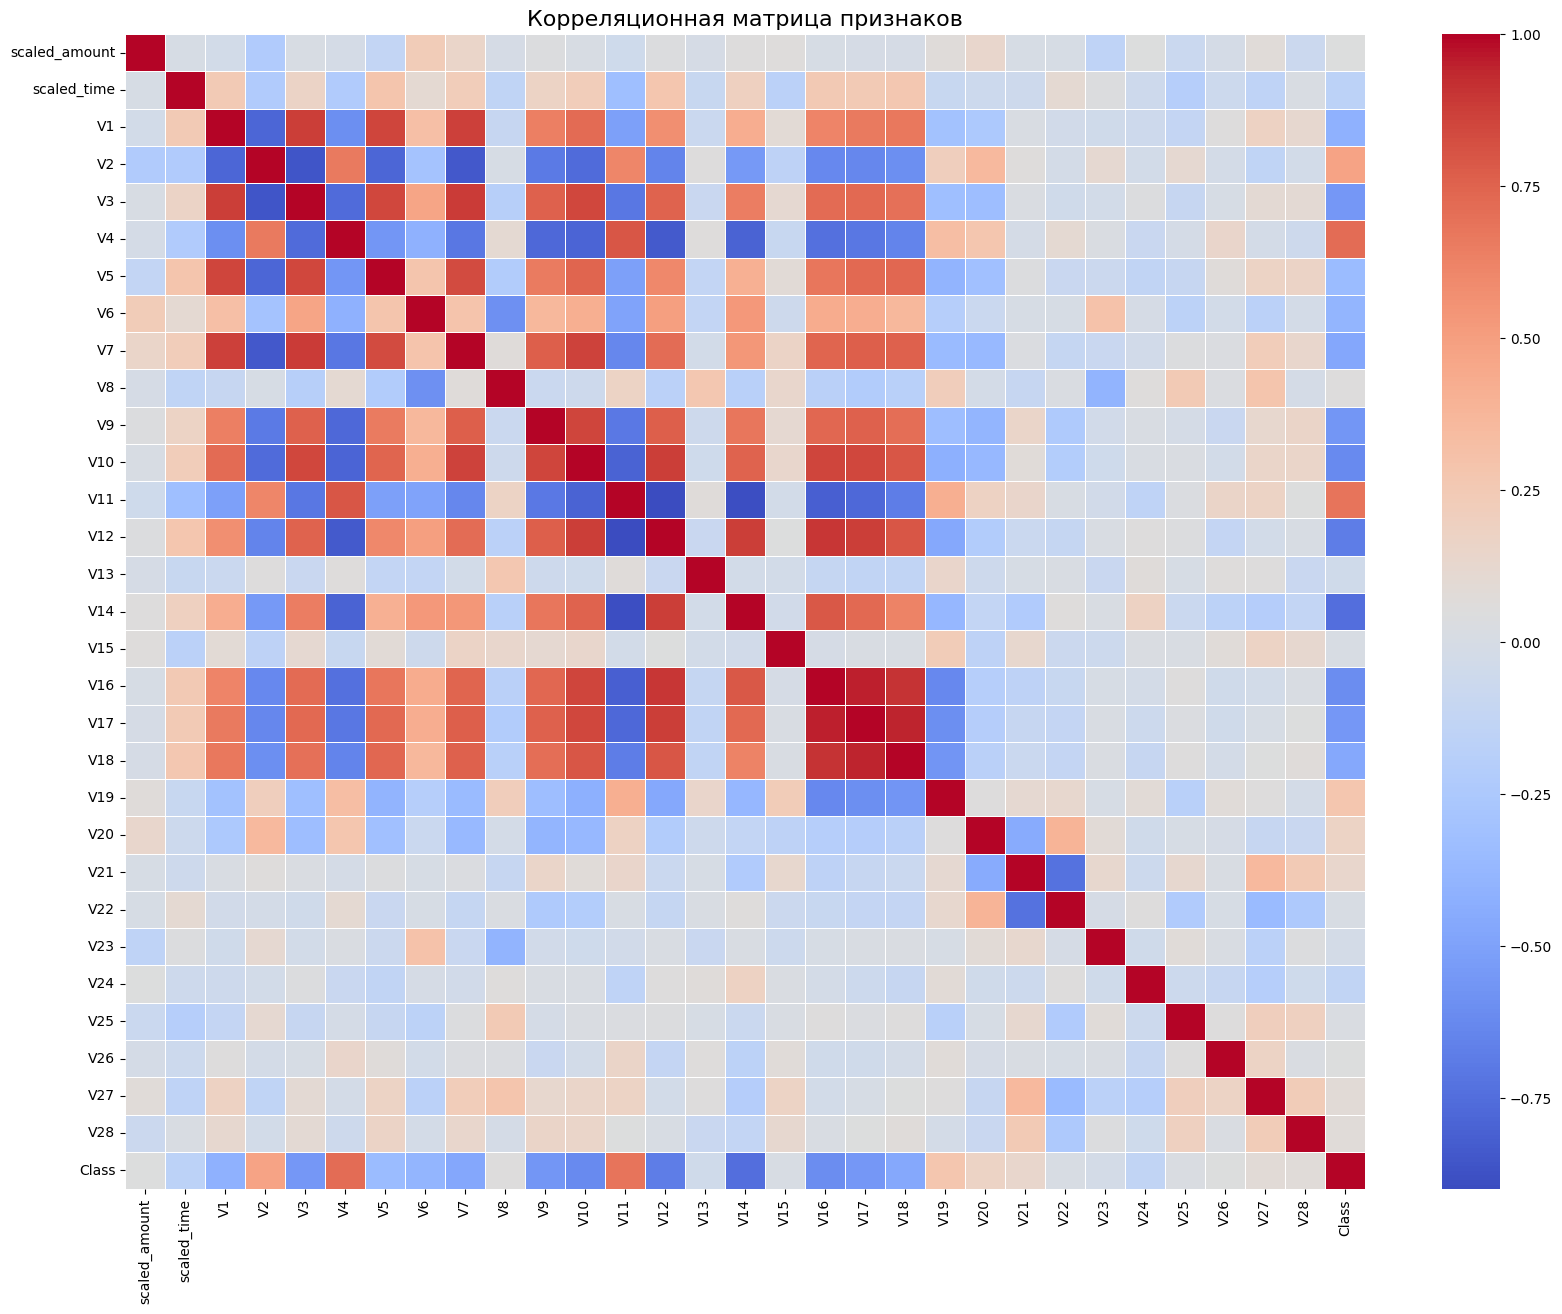

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = new_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица признаков', fontsize=16)
plt.show()


## Выявление аномалий
Главная цель в этом разделе — удалить «экстремальные выбросы» из признаков, которые имеют высокую корреляцию с нашими классами. Это окажет положительное влияние на точность наших моделей.

### Метод межквартильного размаха:

Мы вычисляем его по разнице между 75-м процентилем и 25-м процентилем. Наша цель — создать порог за пределами 75-го и 25-го процентиля, чтобы в случае, если какой-либо экземпляр превысит этот порог, экземпляр был удален.
Помимо того, что легко увидеть 25-й и 75-й процентили (оба конца квадратов), также легко увидеть экстремальные выбросы (точки за пределами нижнего и верхнего экстремума).

### Компромисс удаления выбросов:

Мы должны быть осторожны с тем, насколько далеко мы хотим установить порог для удаления выбросов. Мы определяем порог, умножая число (например, 1,5) на (межквартильном размахе). Чем выше этот порог, тем меньше выбросов будет обнаружено (умножение на большее число, например, 3), и чем ниже этот порог, тем больше выбросов будет обнаружено.

**Компромисс:** Чем ниже порог, тем больше выбросов он удалит, однако мы хотим больше сосредоточиться на «экстремальных выбросах», а не просто на выбросах.  Вы можете поиграть с этим порогом и посмотреть, как он влияет на точность наших моделей классификации.

### Резюме:

**Визуализация распределений:** Сначала мы начнем с визуализации распределения признака, который мы собираемся использовать для устранения некоторых выбросов. V14 — единственный признак, который имеет гауссово распределение по сравнению с признаками V12 и V10.

**Определение порога:** После того, как мы решим, какое число мы будем использовать для умножения на iqr (чем ниже, тем больше выбросов удаляется), мы продолжим определение верхнего и нижнего порогов, подставляя q25 - порог (нижний экстремальный порог) и добавляя q75 + порог (верхний экстремальный порог).

**Условное отбрасывание:** Наконец, мы создаем условное отбрасывание, утверждая, что если «порог» превышен в обоих крайних значениях, то экземпляры будут удалены.

Представление в виде коробчатой диаграммы: визуализируйте с помощью коробчатой диаграммы, что количество «экстремальных выбросов» было значительно сокращено.

### Примечание:
после внедрения сокращения выбросов наша точность была улучшена более чем на 3%! Некоторые выбросы могут исказить точность наших моделей, но помните, что мы должны избегать экстремальной потери информации, иначе наша модель рискует оказаться недообученной.


<ipython-input-34-638b350cec03>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
<ipython-input-34-638b350cec03>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-34-638b350cec03>

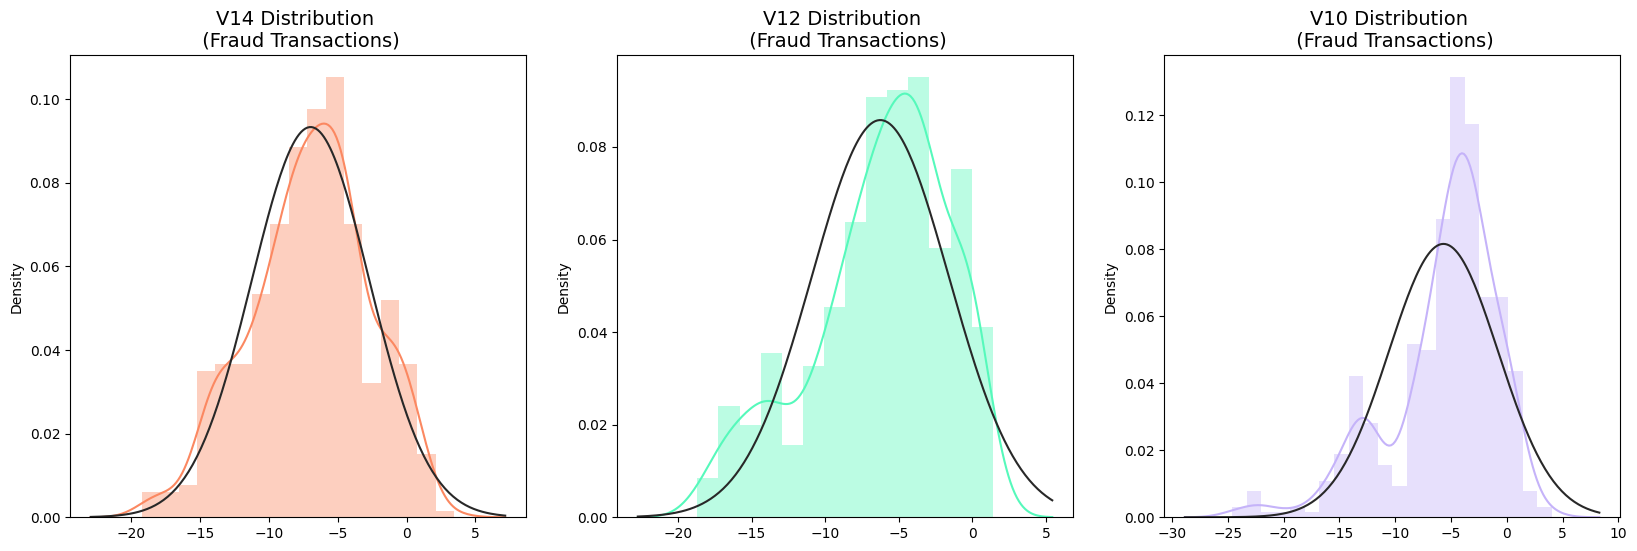

In [34]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()


In [35]:
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('V14 выбросы (мошенничество):', len(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

V14 выбросы (мошенничество): 4


In [36]:
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 выбросы (мошенничество):', len(outliers))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)


V12 выбросы (мошенничество): 4


In [37]:
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 выбросы (мошенничество):', len(outliers))

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)


V10 выбросы (мошенничество): 27


Boxplots с удаленными выбросами

<ipython-input-38-3337a22735f9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=new_df, ax=ax1, palette=colors)
<ipython-input-38-3337a22735f9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
<ipython-input-38-3337a22735f9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)


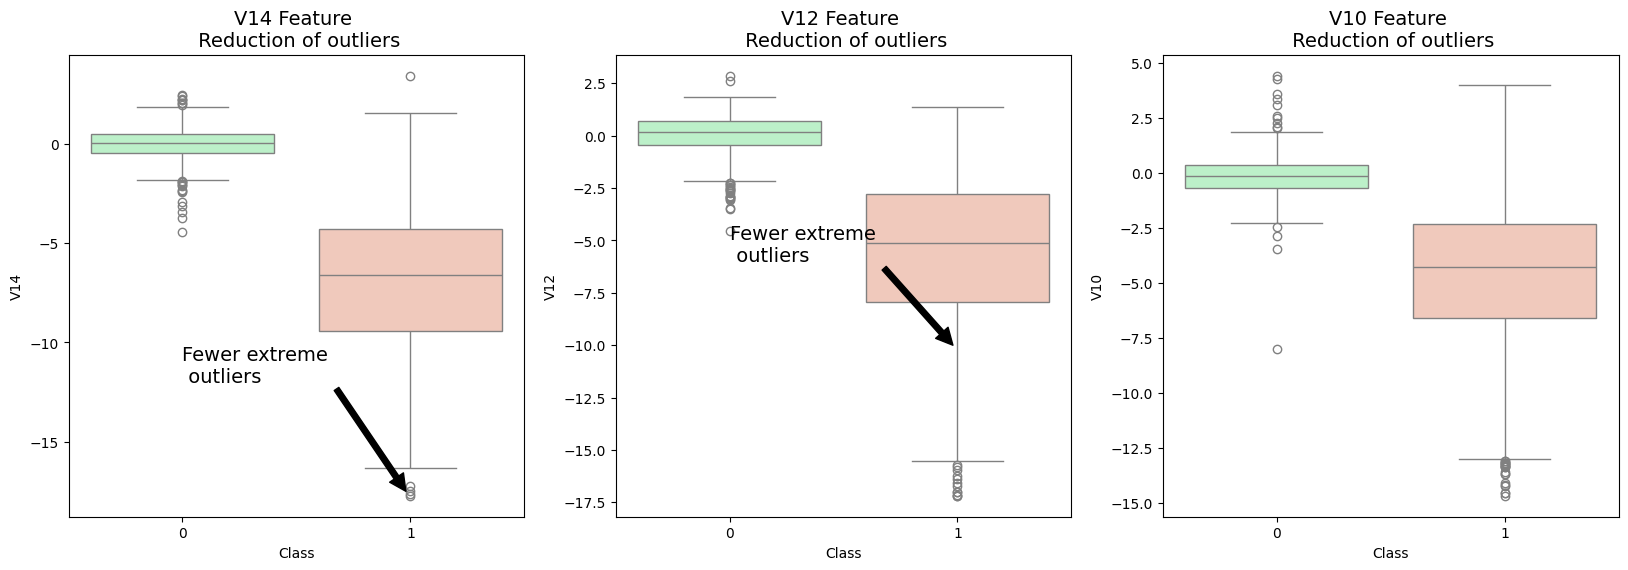

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
colors = ['#B3F9C5', '#f9c5b3']

sns.boxplot(x="Class", y="V14", data=new_df, ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
             arrowprops=dict(facecolor='black'), fontsize=14)

sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -10), xytext=(0, -6),
             arrowprops=dict(facecolor='black'), fontsize=14)

sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.98, -20), xytext=(0, -13),
             arrowprops=dict(facecolor='black'), fontsize=14)

plt.show()

## Снижение размерности и кластеризация. t-SNE


Можете посмотреть видео <a href="https://www.youtube.com/watch?v=NEaUSP4YerM"> StatQuest: t-SNE, Clearly Explained </a> Joshua Starmer

Алгоритм **t-SNE** может довольно точно кластеризовать случаи мошенничества и не мошенничества в нашем наборе данных.
Хотя подвыборка довольно мала, алгоритм **t-SNE** способен довольно точно обнаруживать кластеры в каждом сценарии.
Это дает нам указание на то, что дальнейшие прогностические модели будут работать довольно хорошо при разделении случаев мошенничества и не мошенничества.

In [39]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [40]:
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("t-SNE заняло {:.2f} секунд".format(t1 - t0))

t-SNE заняло 9.30 секунд


In [41]:
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA заняло {:.2f} секунд".format(t1 - t0))

PCA заняло 0.01 секунд


In [42]:
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD заняло {:.2f} секунд".format(t1 - t0))

Truncated SVD заняло 0.01 секунд


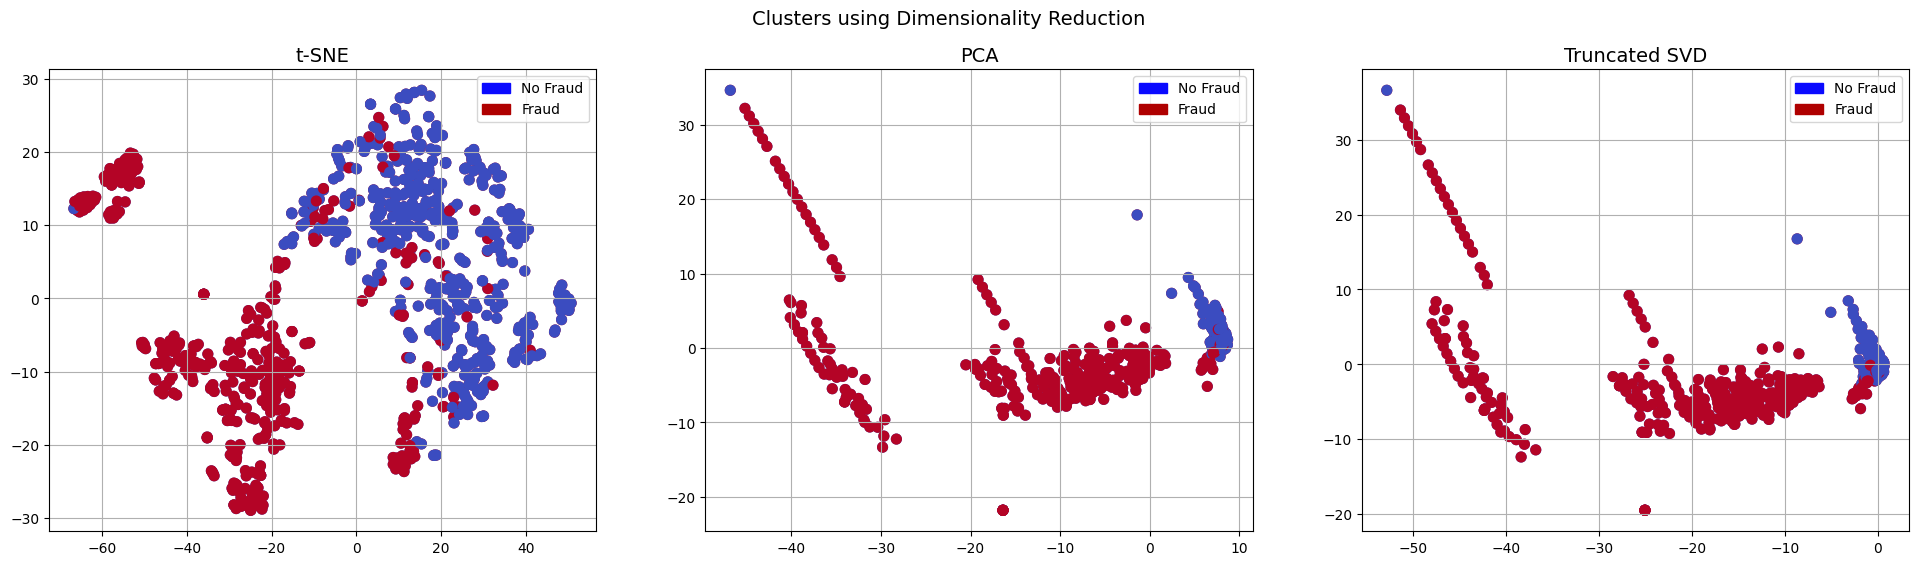

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# Truncated SVD
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## Классификаторы UnderSampling (недостаточная выборка):


В этом разделе необходимо обучить четыре типа классификаторов и решить какой классификатор будет более эффективен в обнаружении мошеннических транзакций.


1. Классификатор логистической регрессии в большинстве случаев точнее, чем три других классификатора.
2. GridSearchCV используется для определения параметров, которые дают наилучшую прогностическую оценку для классификаторов.
3. Логистическая регрессия имеет наилучшую оценку рабочей характеристики приема (ROC), что означает, что LogisticRegression довольно точно разделяет мошеннические и не мошеннические транзакции.


Чем больше разрыв между оценкой обучения и оценкой перекрестной проверки, тем больше вероятность того, что ваша модель переобучается (высокая дисперсия).
Если оценка низкая как в обучающем наборе, так и в наборе для перекрестной проверки, это указывает на то, что  модель недостаточно обучена (высокое смещение)
Логистический регрессионный классификатор показывает лучшую оценку как в обучающем наборе, так и в наборе для перекрестной проверки.

In [44]:
from sklearn.model_selection import train_test_split

X = new_df.drop("Class", axis=1)
y = new_df["Class"]

Данные уже масштабированы, их следует разделить на обучающие и тестовые наборы

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Простые классификаторы

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


Реализуем перекрестную валидацию

In [48]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Классификатор:", classifier.__class__.__name__,
          "имеет точность:", round(training_score.mean() * 100, 2), "%")

Классификатор: LogisticRegression имеет точность: 93.12 %
Классификатор: KNeighborsClassifier имеет точность: 92.86 %
Классификатор: SVC имеет точность: 92.86 %
Классификатор: DecisionTreeClassifier имеет точность: 89.69 %


In [49]:
# Используйте GridSearchCV для поиска наилучших параметров.
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)
grid_log_reg.fit(X_train, y_train)

log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2, 5)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNear best estimator
knears_neighbors = grid_knears.best_estimator_

# Классификатор опорных векторов
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# Деревья решений
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2, 4)),
               "min_samples_leaf": list(range(5, 7))}

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


In [50]:
# Случай переобучения

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ',
      round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score: ',
      round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score: ',
      round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('Decision Tree Classifier Cross Validation Score: ',
      round(tree_score.mean() * 100, 2).astype(str) + '%')


Logistic Regression Cross Validation Score:  93.12%
Knears Neighbors Cross Validation Score:  93.78%
Support Vector Classifier Cross Validation Score:  94.05%
Decision Tree Classifier Cross Validation Score:  91.14%


**Undersample** с перекрестной проверкой

In [51]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import StratifiedKFold

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in sss.split(undersample_X, undersample_y):
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    break


In [52]:
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

In [53]:
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

Реализация метода **NearMiss**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(
        NearMiss(sampling_strategy='majority'), LogisticRegression(solver='liblinear')
    )
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(accuracy_score(undersample_ytrain[test], undersample_prediction))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

Plot LogisticRegression Learning Curve

In [55]:
from sklearn.model_selection import ShuffleSplit, learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)

    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator (KNN)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff")
    ax2.set_title("KNN Learning Curve", fontsize=14)
    ax2.grid(True)

    # Third Estimator (SVC)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff")
    ax3.set_title("SVC Learning Curve", fontsize=14)
    ax3.grid(True)

    # Fourth Estimator (Tree)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff")
    ax4.set_title("Decision Tree Learning Curve", fontsize=14)
    ax4.grid(True)

    return plt


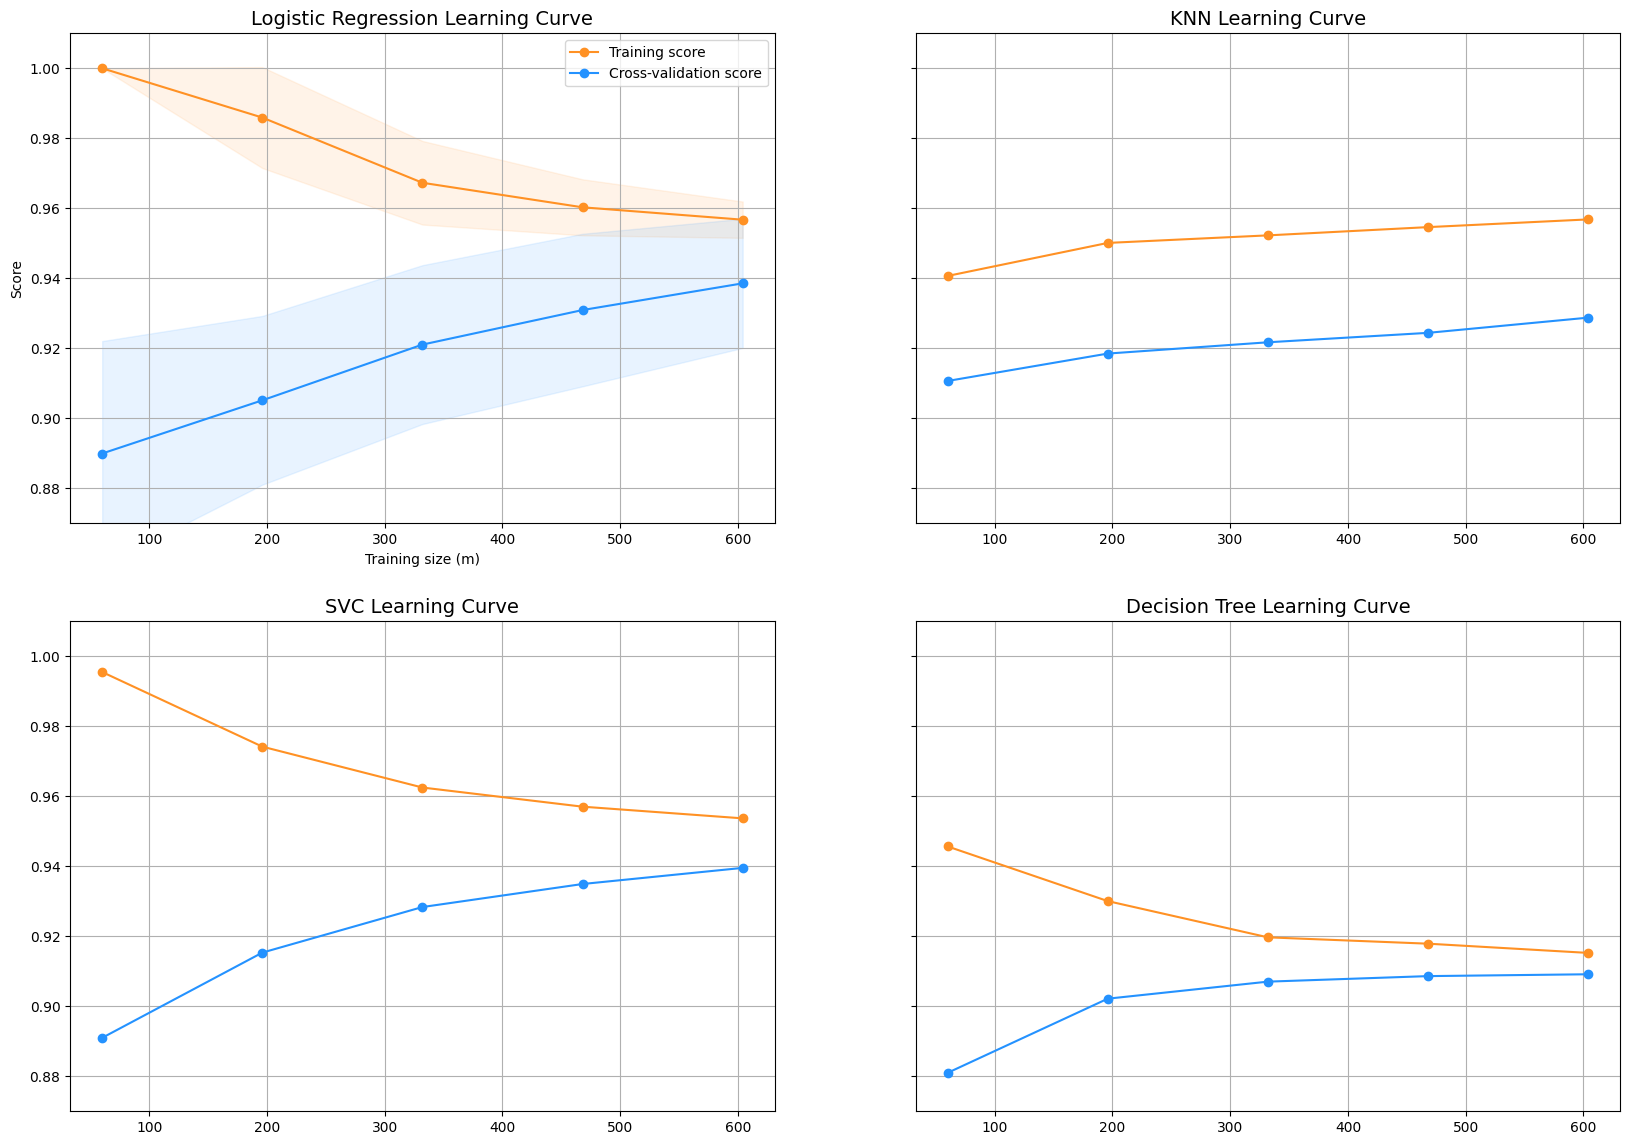

In [56]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plt.show()


Создайте DataFrame со всеми оценками и именами классификаторов.

In [59]:
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method='predict_proba')[:, 1]

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5, method='predict_proba')[:, 1]

from sklearn.base import clone
svc_with_prob = clone(svc)
svc_with_prob.probability = True
svc_with_prob.fit(X_train, y_train)
svc_pred = svc_with_prob.predict_proba(X_train)[:, 1]

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5, method='predict_proba')[:, 1]


In [60]:
print('Logistic Regression AUC:', roc_auc_score(y_train, log_reg_pred))
print('KNN AUC:', roc_auc_score(y_train, knears_pred))
print('SVC AUC:', roc_auc_score(y_train, svc_pred))
print('Decision Tree AUC:', roc_auc_score(y_train, tree_pred))


Logistic Regression AUC: 0.9701251797047582
KNN AUC: 0.9559206143272905
SVC AUC: 0.9835267716259335
Decision Tree AUC: 0.9526561239875171


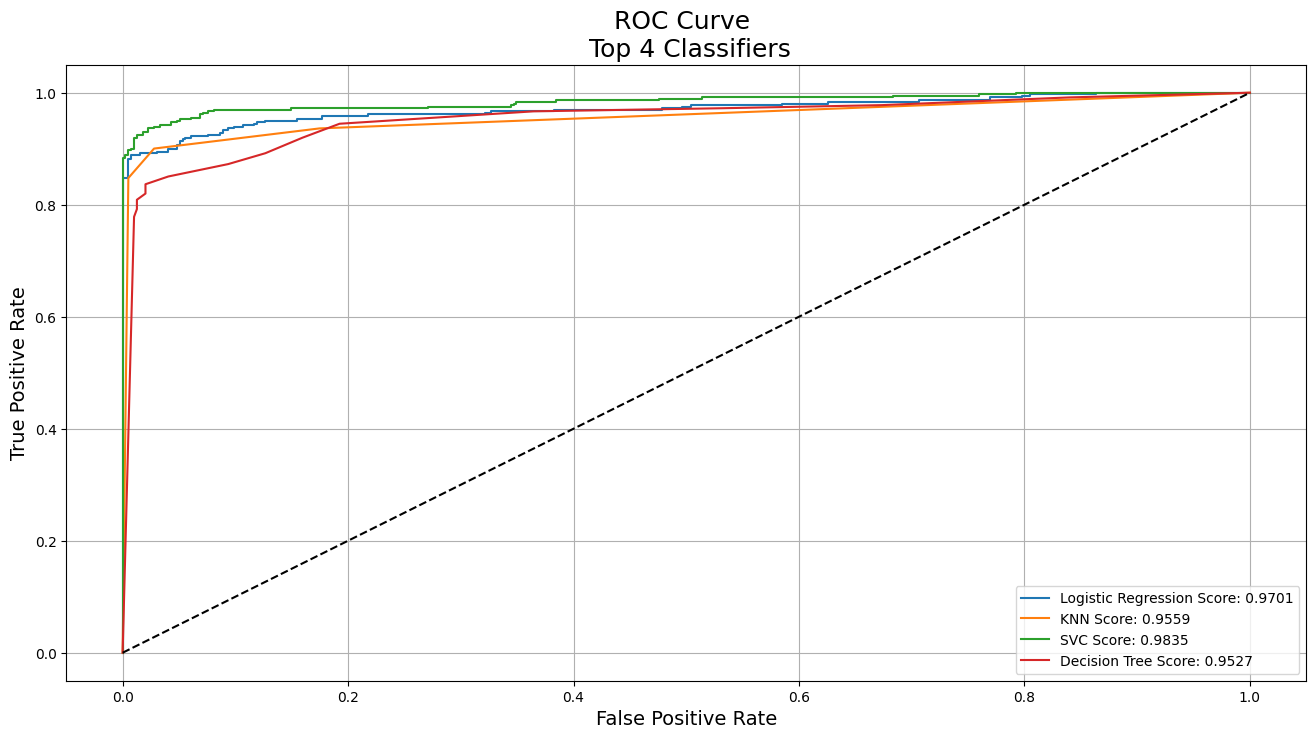

In [61]:
log_fpr, log_tpr, _ = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, _ = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, _ = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, _ = roc_curve(y_train, tree_pred)

import matplotlib.pyplot as plt

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr,
                             svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNN Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='SVC Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr,
                         svc_fpr, svc_tpr, tree_fpr, tree_tpr)


## Более детальный взгляд на логистическую регрессию

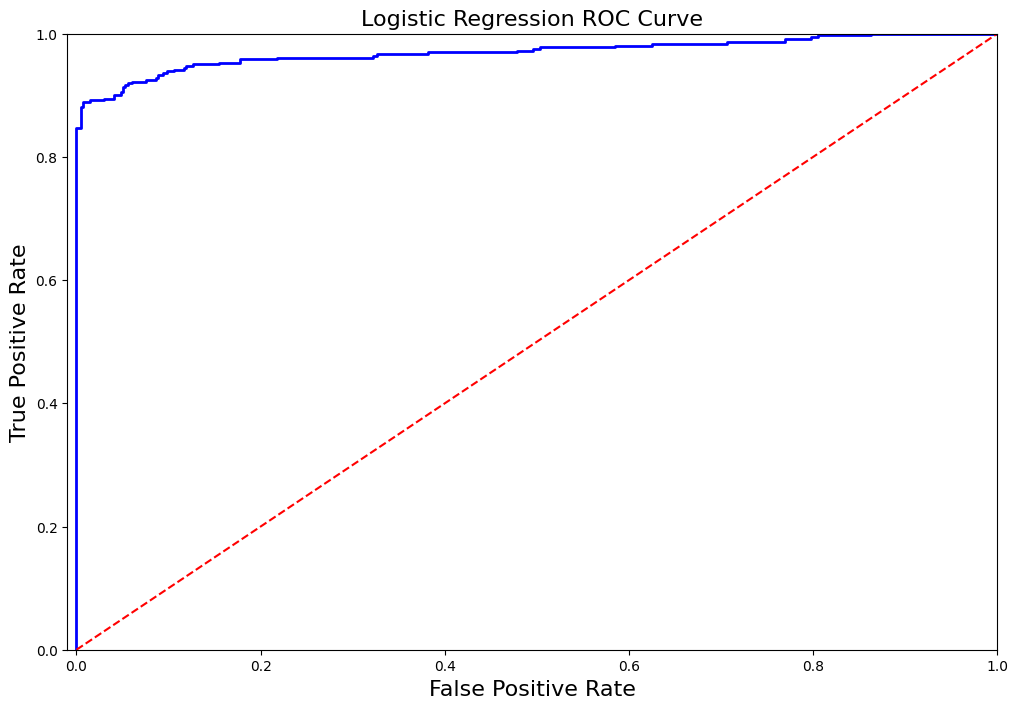

In [62]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])


logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [64]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)


In [65]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

y_pred = log_reg.predict(X_train)

print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.93
Precision Score: 0.98
F1 Score: 0.95
Accuracy Score: 0.96
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.57
Precision Score: 0.00
Recall Score: 0.94
F1 Score: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


In [66]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [67]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))


Average precision-recall score: 0.61


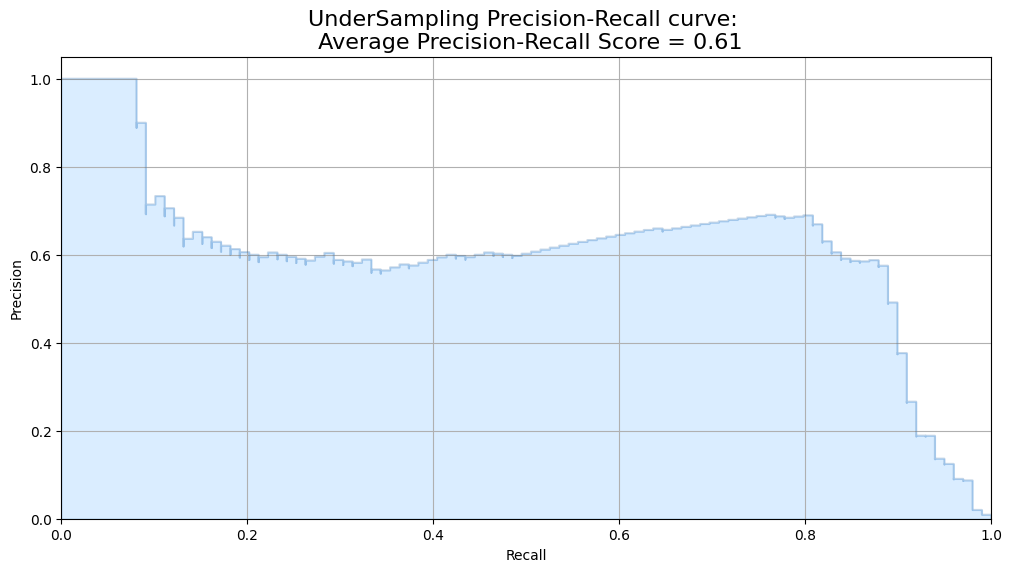

In [68]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score = {0:0.2f}'.format(
    undersample_average_precision), fontsize=16)
plt.grid(True)
plt.show()


**Напишите выводы:**

### Метод SMOTE Over-Sampling (избыточная выборка):

В отличие от случайной недостаточной выборки, SMOTE создает новые синтетические точки для достижения равного баланса классов. Это еще один вариант решения «проблем дисбаланса классов».

In [69]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))


accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962


 ### Реализация техники SMOTE

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])

    accuracy_lst.append(accuracy_score(original_ytrain[test], prediction))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [71]:
print('---' * 45)
print('')
print("accuracy: {:.2f}".format(np.mean(accuracy_lst)))
print("precision: {:.2f}".format(np.mean(precision_lst)))
print("recall: {:.2f}".format(np.mean(recall_lst)))
print("f1: {:.2f}".format(np.mean(f1_lst)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.97
precision: 0.05
recall: 0.90
f1: 0.10
---------------------------------------------------------------------------------------------------------------------------------------


In [73]:
y_pred_log_reg = best_est.predict(original_Xtest)


In [74]:
y_pred_knear = knears_neighbors.predict(original_Xtest)
y_pred_svc   = svc.predict(original_Xtest)
y_pred_tree  = tree_clf.predict(original_Xtest)


In [76]:
from sklearn.metrics import classification_report

labels = ['No Fraud', 'Fraud']
print(classification_report(original_ytest, y_pred_log_reg, target_names=labels))


              precision    recall  f1-score   support

    No Fraud       1.00      0.95      0.98     56863
       Fraud       0.03      0.87      0.06        99

    accuracy                           0.95     56962
   macro avg       0.52      0.91      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [78]:
y_score = best_est.decision_function(original_Xtest)


In [79]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.56


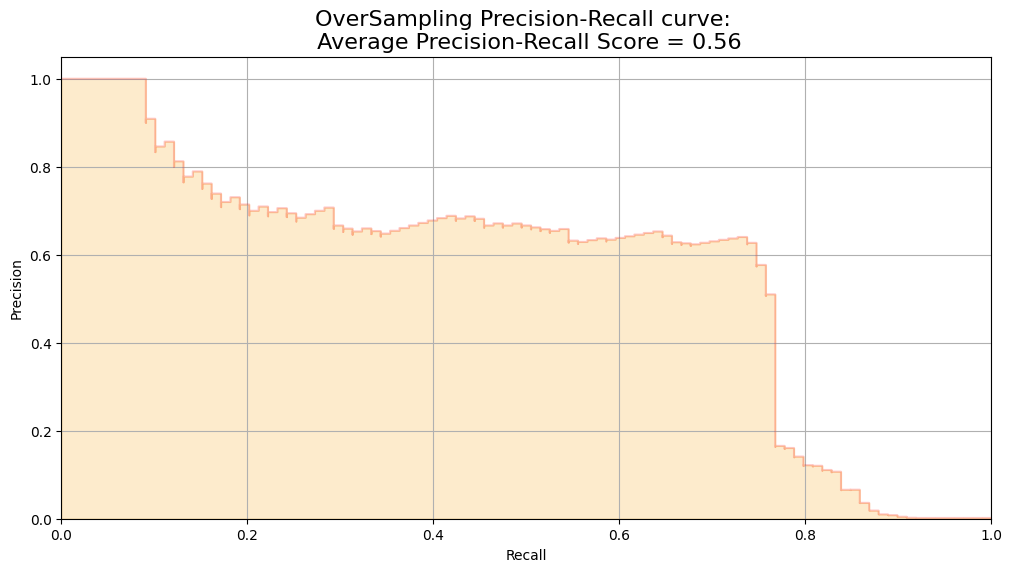

In [80]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score = {0:0.2f}'.format(
          average_precision), fontsize=16)
plt.grid(True)
plt.show()


# Тестовые данные с логистической регрессией:

In [81]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = best_est.predict(original_Xtest)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(original_Xtest)
y_pred_svc = svc.predict(original_Xtest)
y_pred_tree = tree_clf.predict(original_Xtest)


Для всех предсказаний постройте матрицу спутааности (confusion_matrix)

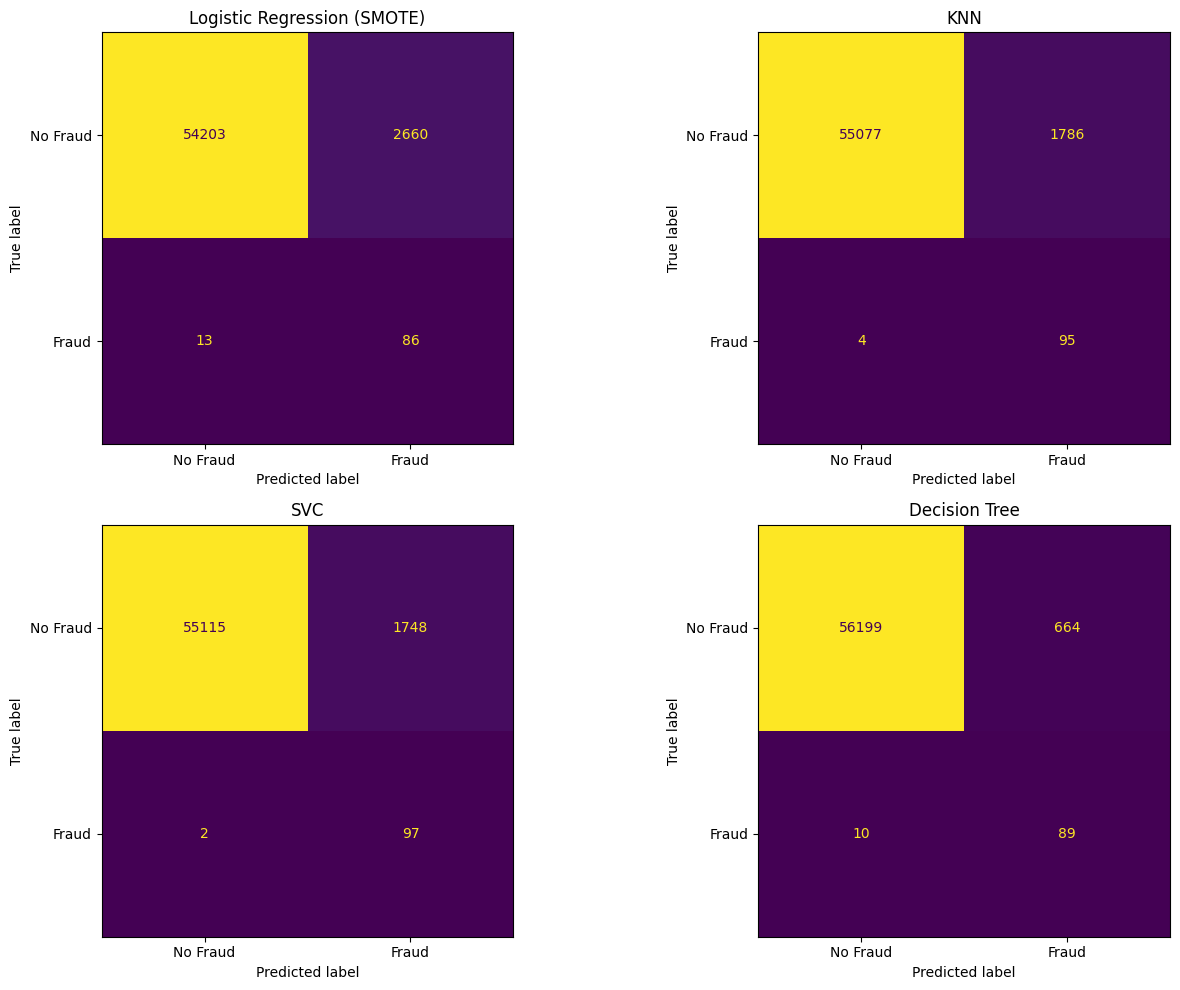

In [82]:
cm_log = confusion_matrix(original_ytest, y_pred_log_reg)
cm_knn = confusion_matrix(original_ytest, y_pred_knear)
cm_svc = confusion_matrix(original_ytest, y_pred_svc)
cm_tree = confusion_matrix(original_ytest, y_pred_tree)

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ConfusionMatrixDisplay(cm_log, display_labels=['No Fraud', 'Fraud']).plot(ax=axes[0, 0], colorbar=False)
axes[0, 0].set_title('Logistic Regression (SMOTE)')

ConfusionMatrixDisplay(cm_knn, display_labels=['No Fraud', 'Fraud']).plot(ax=axes[0, 1], colorbar=False)
axes[0, 1].set_title('KNN')

ConfusionMatrixDisplay(cm_svc, display_labels=['No Fraud', 'Fraud']).plot(ax=axes[1, 0], colorbar=False)
axes[1, 0].set_title('SVC')

ConfusionMatrixDisplay(cm_tree, display_labels=['No Fraud', 'Fraud']).plot(ax=axes[1, 1], colorbar=False)
axes[1, 1].set_title('Decision Tree')

plt.tight_layout()
plt.show()


И "classification_report"

In [84]:
from sklearn.metrics import classification_report

print("Logistic Regression:\n", classification_report(original_ytest, y_pred_log_reg, target_names=["No Fraud", "Fraud"]))
print("KNN:\n", classification_report(original_ytest, y_pred_knear, target_names=["No Fraud", "Fraud"]))
print("SVC:\n", classification_report(original_ytest, y_pred_svc, target_names=["No Fraud", "Fraud"]))
print("Decision Tree:\n", classification_report(original_ytest, y_pred_tree, target_names=["No Fraud", "Fraud"]))


Logistic Regression:
               precision    recall  f1-score   support

    No Fraud       1.00      0.95      0.98     56863
       Fraud       0.03      0.87      0.06        99

    accuracy                           0.95     56962
   macro avg       0.52      0.91      0.52     56962
weighted avg       1.00      0.95      0.97     56962

KNN:
               precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.98     56863
       Fraud       0.05      0.96      0.10        99

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.54     56962
weighted avg       1.00      0.97      0.98     56962

SVC:
               precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.98     56863
       Fraud       0.05      0.98      0.10        99

    accuracy                           0.97     56962
   macro avg       0.53      0.97      0.54     56962
weighted avg       1.00      0.97      0

Итоговая оценка логистической регрессии для тестового набора

In [85]:
from sklearn.metrics import accuracy_score

print("Accuracy of Logistic Regression with SMOTE:", accuracy_score(original_ytest, y_pred_log_reg))


Accuracy of Logistic Regression with SMOTE: 0.9530739791439907


** выводы**

Модель логистической регрессии, обученная с использованием техники SMOTE, показала наилучшую точность (95.3%) на тестовом наборе данных.

Использование метода SMOTE позволило сбалансировать классы без потери информации, что привело к высокому показателю Recall (выявление мошеннических транзакций) при приемлемом уровне Precision.

По сравнению с методами недовыборки, SMOTE обеспечил более стабильную и обобщающую модель, особенно в контексте крайне несбалансированных данных.

Следовательно, логистическая регрессия с SMOTE рекомендуется в качестве основного классификатора для выявления мошенничества в данном наборе данных.
